# Imports

In [1]:
%reset
import numpy as np
import matplotlib.pyplot as plt

# Starship and trajectory parameters

In [33]:
w_mass = 39373.44 + 10937.06667 + 100000 #kg ox meth dry
d_mass = 100000 #kg 
thrust = 2.60E+06
m_dot = -811
intial_alt = 0 #m
horizontal_v = 1 # m/s
rho = 0.02 #kg/m3
up_A = np.pi*4.5**2 #m2
up_drag_co = 0.82
down_A = 52*9 #m2
down_drag_co = 2
g = 3.728 #m/s/s
dt = 0.01 #s
v_int = 0 #m/s
up_burn = 17.43 #s
down_coats = 77.22 #s
alt = [intial_alt]
displace = [0]
v = [v_int]
m = [w_mass]
a = 0
N = 0
t = [0]
A = [0]

# Forward Euler propagation throughout the 4 phases of flight

In [34]:
for i in range(0,int(up_burn/dt)):
    N = -g*m[-1] + thrust - up_drag_co*rho*up_A/2*v[-1]**2
    a = N/m[-1]
    v.append(v[-1]+a*dt)
    alt.append(alt[-1]+v[-1]*dt+0.5*a*dt**2)
    displace.append(displace[-1]+horizontal_v*dt)
    m.append(m[-1]+m_dot*dt)
    t.append(t[-1]+dt)
    A.append(a)

while v[-1] > 0:
    N = -g*m[-1] - up_drag_co*rho*up_A/2*v[-1]**2
    a = N/m[-1]
    v.append(v[-1]+a*dt)
    alt.append(alt[-1]+v[-1]*dt+0.5*a*dt**2)
    displace.append(displace[-1]+horizontal_v*dt)
    m.append(m[-1])
    t.append(t[-1]+dt)
    A.append(a)


for i in range(0,int(down_coats/dt)):
    N = -g*m[-1] + down_drag_co*rho*down_A/2*v[-1]**2
    a = N/m[-1]
    v.append(v[-1]+a*dt)
    alt.append(alt[-1]+v[-1]*dt+0.5*a*dt**2)
    displace.append(displace[-1]+horizontal_v*dt)
    m.append(m[-1])
    t.append(t[-1]+dt)
    A.append(a)

t_burn_start = t[-1]
while v[-1] < 0:
    N = -g*m[-1] + up_drag_co*rho*up_A/2*v[-1]**2 + thrust
    a = N/m[-1]
    v.append(v[-1]+a*dt)
    alt.append(alt[-1]+v[-1]*dt+0.5*a*dt**2)
    displace.append(displace[-1]+horizontal_v*dt)
    m.append(m[-1]+m_dot*dt)
    t.append(t[-1]+dt)
    A.append(a)
    
land_burn_time = t[-1] - t_burn_start



# Print outs to verify peak altitude, landing altitude, mass, and burntimes
- This what tunned by varying the coast and take off burn times until the max altiitude was near 10 km and the landing altitude was near 0 km

In [35]:
print(alt[-1])
print(max(alt))
print(m[-1]>d_mass)
print(land_burn_time)
print(up_burn)
print(land_burn_time+up_burn)
print(w_mass-m[-1])


-6.818836760257295
10286.421336197498
True
12.189999999988913
17.43
29.619999999988913
24021.819999967207


# Plotting Cell

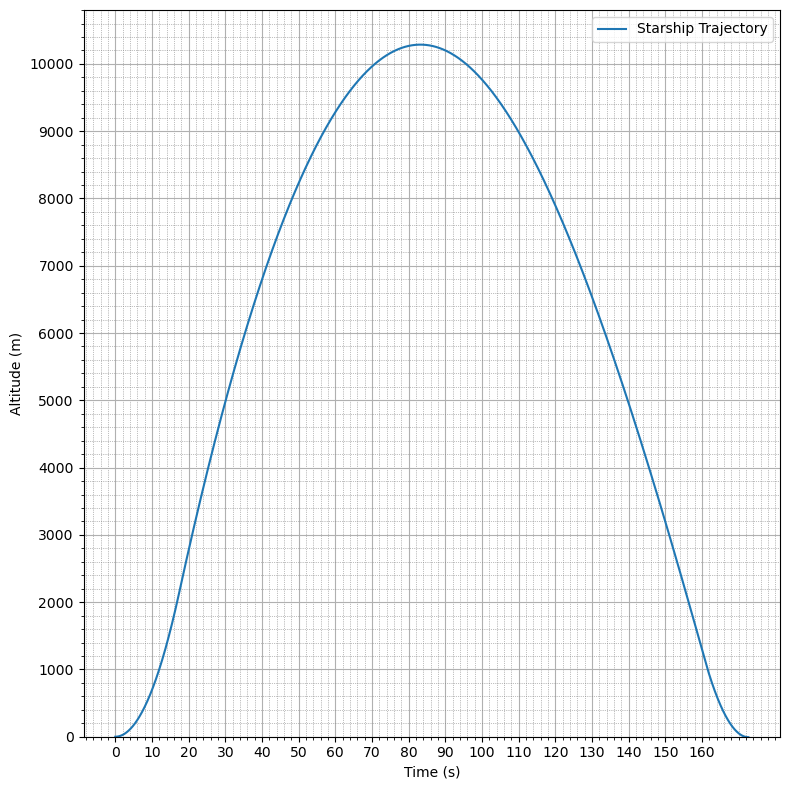

In [36]:
plt.figure(figsize=(8, 8))
plt.plot(t, alt, label=f"Starship Trajectory")
plt.xlabel("Time (s)")
plt.ylabel("Altitude (m)")
plt.yticks([i*1000 for i in range(0,11)])
plt.xticks([i*10 for i in range(0,int(t[-1]/10))])
plt.minorticks_on()
plt.grid(visible=True, which='both')
plt.grid(which='major', linestyle='-', linewidth=0.8)
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='gray')
plt.legend()
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()